<a href="https://colab.research.google.com/github/alirezash97/Galaxy-Classification/blob/master/Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# !pip install kaggle
# !mkdir .kaggle
# !ls -a
# import json
# token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
# with open('/content/.kaggle/kaggle.json', 'w') as file:
    # json.dump(token, file)
# !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
# !kaggle config set -n path -v{/content}
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets list
# !kaggle datasets list -s galaxy-zoo
# !kaggle datasets download -d zhuangjw/galaxy-zoo-cleaned -p /content
# !unzip /content/galaxy-zoo-cleaned.zip
# !pip install netCDF4

galaxy-zoo-cleaned.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:

import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import Model
import cv2
from tqdm import tqdm

[0.950155   0.         0.049845   0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.142862   0.857138   0.9128833  0.03727173 0.
 0.         0.02385795 0.         0.         0.071431   0.04757304
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


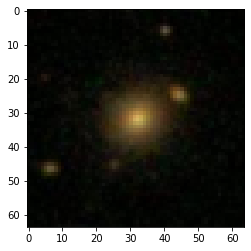

[0.326782   0.64144    0.031777   0.15993729 0.4815027  0.
 0.4815027  0.310446   0.17105673 0.09023072 0.39127198 0.
 0.         0.184619   0.815381   0.         0.23445237 0.09232964
 0.         0.0369238  0.1107714  0.         0.0369238  0.
 0.         0.10971554 0.         0.05022175 0.1974275  0.11301848
 0.         0.         0.         0.         0.         0.
 0.310446  ]


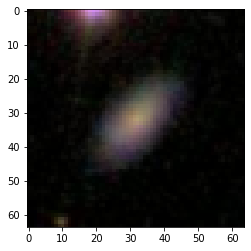

[0.107013   0.881299   0.011687   0.7754515  0.10584754 0.05251255
 0.05333498 0.         0.10584754 0.         0.10584754 0.
 0.         0.452513   0.547487   0.         0.01908737 0.08792563
 0.04004152 0.         0.16069324 0.03021067 0.15662153 0.
 0.06494557 0.37610483 0.17203623 0.22731042 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


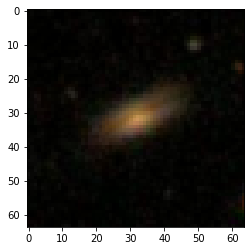

[0.865847   0.106967   0.027187   0.0534835  0.0534835  0.
 0.0534835  0.         0.0534835  0.         0.02940806 0.02407544
 0.         0.051114   0.948886   0.00370323 0.31727752 0.54486626
 0.00608257 0.         0.         0.         0.04503144 0.
 0.         0.02674175 0.02674175 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


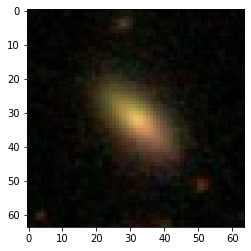

[2.8729999e-02 9.7127002e-01 0.0000000e+00 9.7127002e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7884700e-01 8.2115299e-01
 9.2199998e-04 0.0000000e+00 2.7807852e-02 9.6659653e-02 4.1093674e-02
 4.1093674e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.8412763e-01 2.8714237e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


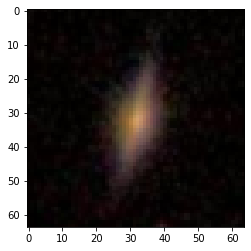

In [13]:
import netCDF4
train = netCDF4.Dataset('/content/galaxy_train.nc')
train_images = train.variables['image_train']
train_labels = train.variables['label_train']
for i in range(5):
  print(train_labels[i+1000][:])
  plt.imshow(train_images[i+1000])
  plt.show()

In [62]:
for d in test.dimensions.items():
  print(d)

('sample', <class 'netCDF4._netCDF4.Dimension'>: name = 'sample', size = 79975)
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 64)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 64)
('channel', <class 'netCDF4._netCDF4.Dimension'>: name = 'channel', size = 3)


In [1]:
(train_images, train_labels) = train_images[:50000], train_labels[:50000]
(test_images, test_labels) = test_images[55000:60000], labels[55000:60000]


# x = []
# for img in train_images[:3]:
#   x.append(img)
#   plt.imshow(img)
#   plt.show()
# m = len(x)


# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255., test_images / 255.

NameError: ignored

In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


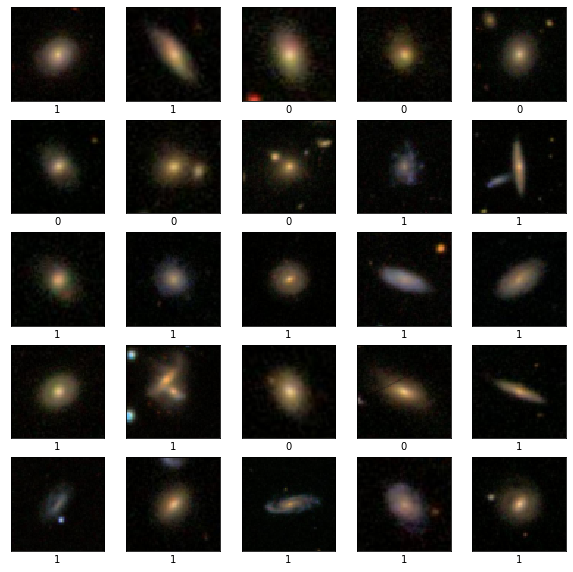

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    max_index = np.argmax(train_labels[i][:3])
    plt.xlabel(max_index)
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(37, activation='sigmoid'))

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, 
                    validation_data=(test_images, test_labels))

Train on 5000 samples, validate on 5000 samples
Epoch 1/10


KeyboardInterrupt: ignored

In [0]:
(test_images, test_labels) = images[40000:45000], labels[40000:45000]


In [0]:
x = test_images[2:3]
y = test_labels[2:3]

print(y)

In [39]:
y_hat = model.predict(test_images)
# z = y - y_hat
# print(y)
print(y_hat.shape)
# print(z)

(5000, 37)


In [40]:
model.evaluate(test_images, test_labels)

5000/5000 [==============================] - 18s 4ms/sample - loss: 14.1607 - acc: 0.7254


[14.160718212890625, 0.7254]